## **Match Duration Analysis - Women's Euro 2022 & 2025 comparison**

When I read this article in the Guardian about how long the ball was in play in the Premier League (https://www.theguardian.com/football/2025/oct/15/longer-games-less-football-ball-play-premier-league), it got me thinking about whether the situation was the same in the women's game. My hypothesis was that perhaps in the women's game the ball is in play longer, maybe because I have this impression that female players are not deploying delaying tactics as much as the men (completely uninformed hunch btw). So I thought about testing it. 

I looked at data from the 2022 and 2025 Women's Euro to see how long the ball was in play in a match. I used the following proxies for my analysis because I don't have access to more data:

1. Duration from the StatsBomb events API data as a proxy for ball in play - this the duration of any on-ball action/event in a game. 
2. Minute from the StatsBomb events API as a proxy for total match time - the maximum minute is the closest thing I have to total match duration

In [34]:
#install relevant packages
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

In [35]:
#import packages
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [36]:
#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
free_comps

# show all the game competitions available in statsbombpy
game_comps = free_comps[free_comps['competition_gender'] == 'female']
game_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
25,37,90,England,FA Women's Super League,female,False,False,2020/2021,2025-04-23T14:16:46.924831,2021-06-13T16:17:31.694,None,2025-04-23T14:16:46.924831
26,37,42,England,FA Women's Super League,female,False,False,2019/2020,2024-02-12T15:05:34.211400,2021-06-13T16:17:31.694,None,2024-02-12T15:05:34.211400
27,37,4,England,FA Women's Super League,female,False,False,2018/2019,2024-08-07T17:22:40.334287,2021-06-13T16:17:31.694,None,2024-08-07T17:22:40.334287
63,49,3,United States of America,NWSL,female,False,False,2018,2024-12-15T12:31:48.035735,2021-06-13T16:17:31.694,None,2024-12-15T12:31:48.035735
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906
74,72,30,International,Women's World Cup,female,False,True,2019,2024-08-08T15:57:56.748740,2021-06-13T16:17:31.694,None,2024-08-08T15:57:56.748740


### **2025 Euros**

In [37]:
# get matches for the 2025 Women's Euro
matches_womens_euro_2025 = sb.matches(competition_id=53, season_id=315)

# print the column names of the matches dataframe
print(matches_womens_euro_2025.columns)

#print the first few rows of the matches dataframe
matches_womens_euro_2025.head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,4020846,2025-07-27,16:00:00.000,Europe - UEFA Women's Euro,2025,England Women's,Spain Women's,1,1,available,...,2025-07-29T16:03:07.355174,6,Final,St. Jakob-Park,Stéphanie Frappart,Sarina Glotzbach-Wiegman,Montserrat Tomé Vázquez,1.1.0,2,2
1,4020077,2025-07-23,19:00:00.000,Europe - UEFA Women's Euro,2025,Germany Women's,Spain Women's,0,1,available,...,2025-07-25T15:22:27.432293,5,Semi-finals,Stadion Letzigrund,Edina Alves Batista,Christian Richard Wück,Montserrat Tomé Vázquez,1.1.0,2,2
2,4020005,2025-07-22,19:00:00.000,Europe - UEFA Women's Euro,2025,England Women's,Italy Women's,2,1,available,...,2025-07-24T13:46:36.152311,5,Semi-finals,Stade de Genève,Ivana Martinčić,Sarina Glotzbach-Wiegman,Andrea Soncin,1.1.0,2,2
3,4018357,2025-07-19,19:00:00.000,Europe - UEFA Women's Euro,2025,France Women's,Germany Women's,1,1,available,...,2025-07-20T21:36:08.622324,4,Quarter-finals,St. Jakob-Park,Tess Olofsson,Laurent Pierre Bonadéi,Christian Richard Wück,1.1.0,2,2
4,4018356,2025-07-18,19:00:00.000,Europe - UEFA Women's Euro,2025,Spain Women's,Switzerland Women's,2,0,available,...,2025-07-19T21:26:11.543565,4,Quarter-finals,Stadion Wankdorf,Maria Sole Ferrieri Caputi,Montserrat Tomé Vázquez,Pia Mariane Sundhage,1.1.0,2,2


In [38]:
# get all the match IDs
match_ids = matches_womens_euro_2025['match_id'].tolist()
match_ids

# get events for all matches in the 2025 Euro
events = pd.concat([sb.events(match_id=match_id) for match_id in match_ids], ignore_index=True)

# explort events dataframe to a csv file
events.to_csv('womens_euro_2025_events.csv', index=False)



In [39]:
# check how many rows and columns are in the events dataframe
events.shape

(105611, 113)

In [40]:
# print column names of the events dataframe
print(events.columns)

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot',
       ...
       'ball_recovery_offensive', 'dribble_no_touch', 'block_save_block',
       'goalkeeper_penalty_saved_to_post', 'goalkeeper_shot_saved_to_post',
       'shot_open_goal', 'shot_saved_to_post', 'shot_redirect',
       'goalkeeper_lost_out', 'shot_follows_dribble'],
      dtype='object', length=113)


In [41]:
# create a data frame with each match's total seconds
match_durations = events.groupby('match_id')['duration'].sum().reset_index()
match_durations.rename(columns={'duration': 'total_duration'}, inplace=True)
match_durations

# add names of the matches to the match_durations dataframe
match_durations = match_durations.merge(matches_womens_euro_2025[['match_id', 'home_team', 'away_team', 'competition_stage']], on='match_id', how='left')
match_durations

# add a column for max minute in each match
max_minute = events.groupby('match_id')['minute'].max().reset_index()
max_minute.rename(columns={'minute': 'max_minute'}, inplace=True)
match_durations = match_durations.merge(max_minute, on='match_id', how='left')
match_durations

# convert total duration from seconds to minutes
match_durations['total_duration_minutes'] = match_durations['total_duration'] / 60
match_durations

,match_id,total_duration,home_team,away_team,competition_stage,max_minute,total_duration_minutes
0,3998836,2915.025216,Iceland Women's,WNT Finland,Group Stage,97,48.583754
1,3998837,2942.548464,Switzerland Women's,Norway Women's,Group Stage,98,49.042474
2,3998838,2977.884989,Belgium Women's,Italy Women's,Group Stage,98,49.631416
3,3998839,3116.498862,Spain Women's,Portugal Women's,Group Stage,93,51.941648
4,3998840,3213.930883,Germany Women's,Poland Women's,Group Stage,93,53.565515
5,3998841,2831.280401,Denmark Women's,Sweden Women's,Group Stage,99,47.188007
6,3998842,3186.292931,Wales,Netherlands Women's,Group Stage,95,53.104882
7,3998843,3192.963359,France Women's,England Women's,Group Stage,96,53.216056
8,3998844,2570.238303,Switzerland Women's,Iceland Women's,Group Stage,93,42.837305
9,3998845,3287.876672,Norway Women's,WNT Finland,Group Stage,94,54.797945


In [48]:
# % of the match when the ball was in play
match_durations['percentage_in_play'] = (match_durations['total_duration_minutes'] / match_durations['max_minute']) * 100
match_durations

# sort highest to lowest percentage of ball in play
match_durations = match_durations.sort_values(by='percentage_in_play', ascending=False)
match_durations


,match_id,total_duration,home_team,away_team,competition_stage,max_minute,total_duration_minutes,percentage_in_play
29,4020077,4401.625370,Germany Women's,Spain Women's,Semi-finals,121,73.360423,60.628449
19,3998855,3374.973051,Italy Women's,Spain Women's,Group Stage,94,56.249551,59.839948
26,4018356,3311.732129,Spain Women's,Switzerland Women's,Quarter-finals,93,55.195535,59.350038
21,3998857,3310.783365,Poland Women's,Denmark Women's,Group Stage,94,55.179723,58.701833
30,4020846,4469.750908,England Women's,Spain Women's,Final,127,74.495848,58.658148
9,3998845,3287.876672,Norway Women's,WNT Finland,Group Stage,94,54.797945,58.295686
4,3998840,3213.930883,Germany Women's,Poland Women's,Group Stage,93,53.565515,57.597328
17,3998853,3341.911273,Norway Women's,Iceland Women's,Group Stage,97,55.698521,57.421156
16,3998852,3336.145957,WNT Finland,Switzerland Women's,Group Stage,98,55.602433,56.737176
20,3998856,3105.397800,Sweden Women's,Germany Women's,Group Stage,92,51.756630,56.257207


In [43]:
# new data frame where home and away teams are combined into a single column
match_durations_melted = match_durations.melt(id_vars=['match_id', 'competition_stage', 'total_duration', 'total_duration_minutes', 'max_minute', 'percentage_in_play'], value_vars=['home_team', 'away_team'], var_name='team_type', value_name='team')
match_durations_melted

# sum total duration minutes and max minute by team
team_durations = match_durations_melted.groupby('team').agg({'total_duration_minutes': 'sum', 'max_minute': 'sum'}).reset_index()
team_durations

# calculate percentage of time the ball was in play for each team
team_durations['percentage_in_play'] = (team_durations['total_duration_minutes'] / team_durations['max_minute']) * 100
team_durations


,team,total_duration_minutes,max_minute,percentage_in_play
0,Belgium Women's,150.819478,292,51.650506
1,Denmark Women's,153.886911,293,52.521130
2,England Women's,356.852191,660,54.068514
3,France Women's,207.761413,416,49.942647
4,Germany Women's,288.636112,537,53.749742
5,Iceland Women's,147.119580,287,51.261178
6,Italy Women's,266.197876,506,52.608276
7,Netherlands Women's,147.488970,282,52.301053
8,Norway Women's,209.863609,383,54.794676
9,Poland Women's,160.454993,281,57.101421


### **2022 Euros**

In [49]:
# get matches for the 2022 Women's Euro
matches_womens_euro_2022 = sb.matches(competition_id=53, season_id=106)

# print the column names of the matches dataframe
print(matches_womens_euro_2022.columns)

#print the first few rows of the matches dataframe
matches_womens_euro_2022.head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2023-04-14T11:27:39.402579,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
1,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2023-04-14T11:23:11.894822,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
2,3844384,2022-07-20,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Spain Women's,2,1,available,...,2023-04-26T02:03:52.207197,4,Quarter-finals,The American Express Community Stadium,Stéphanie Frappart,Sarina Glotzbach-Wiegman,Jorge Vilda,1.1.0,2,2
3,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2023-04-25T23:30:59.168837,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
4,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2023-04-26T00:44:10.275394,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2


In [75]:
# show all unique values for minute
unique_minutes = events['minute'].unique()
unique_minutes

array([  0,  45,  90, 105, 120,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  40,  41,  42,  43,  44,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  81,  82,  83,  84,  85,  86,  87,  88,  89,  91,
        92,  93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 106,
       107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121,
       122,  58, 123, 124, 125, 126, 127, 113,  39,  97,  80, 128, 129,
       130, 131])

In [52]:
# get all the match IDs
match_ids = matches_womens_euro_2022['match_id'].tolist()
match_ids

# get events for all matches in the 2022 Euro
events2 = pd.concat([sb.events(match_id=match_id) for match_id in match_ids], ignore_index=True)

# see how many rows and columns are in the events dataframe
events2.shape

# show the top 5
events2.head()


,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,goalkeeper_punched_out,goalkeeper_shot_saved_to_post,pass_miscommunication,shot_saved_to_post,shot_open_goal,foul_committed_penalty,foul_won_penalty,goalkeeper_success_in_play,half_start_late_video_start,shot_redirect
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create a data frame with each match's total seconds
match_durations22 = events2.groupby('match_id')['duration'].sum().reset_index()
match_durations22.rename(columns={'duration': 'total_duration'}, inplace=True)
match_durations22

# add names of the matches to the match_durations dataframe
match_durations22 = match_durations22.merge(matches_womens_euro_2022[['match_id', 'home_team', 'away_team', 'competition_stage']], on='match_id', how='left')
match_durations22

# add a column for max minute in each match
max_minute = events2.groupby('match_id')['minute'].max().reset_index()
max_minute.rename(columns={'minute': 'max_minute'}, inplace=True)
match_durations22 = match_durations22.merge(max_minute, on='match_id', how='left')
match_durations22

# convert total duration from seconds to minutes
match_durations22['total_duration_minutes'] = match_durations22['total_duration'] / 60
match_durations22


,match_id,total_duration,home_team,away_team,competition_stage,max_minute,total_duration_minutes
0,3835319,3201.879466,England Women's,Austria Women's,Group Stage,92,53.364658
1,3835320,3045.464116,Norway Women's,Northern Ireland,Group Stage,95,50.757735
2,3835321,3018.810140,Spain Women's,WNT Finland,Group Stage,94,50.313502
3,3835322,2764.572749,Germany Women's,Denmark Women's,Group Stage,94,46.076212
4,3835323,3062.841173,Portugal Women's,Switzerland Women's,Group Stage,96,51.047353
5,3835324,3200.300020,Netherlands Women's,Sweden Women's,Group Stage,94,53.338334
6,3835325,3133.722543,France Women's,Italy Women's,Group Stage,96,52.228709
7,3835326,2931.330072,Belgium Women's,Iceland Women's,Group Stage,94,48.855501
8,3835327,2959.236441,England Women's,Norway Women's,Group Stage,93,49.320607
9,3835328,2782.324503,Austria Women's,Northern Ireland,Group Stage,94,46.372075


In [54]:
# % of the match when the ball was in play
match_durations22['percentage_in_play'] = (match_durations22['total_duration_minutes'] / match_durations22['max_minute']) * 100
match_durations22

# sort highest to lowest percentage of ball in play
match_durations22 = match_durations22.sort_values(by='percentage_in_play', ascending=False)
match_durations22

,match_id,total_duration,home_team,away_team,competition_stage,max_minute,total_duration_minutes,percentage_in_play
18,3835337,3402.494202,Denmark Women's,Spain Women's,Group Stage,92,56.708237,61.639388
14,3835333,3468.603451,France Women's,Belgium Women's,Group Stage,95,57.810058,60.852692
10,3835329,3402.163908,Denmark Women's,WNT Finland,Group Stage,94,56.702732,60.322055
27,3844387,4385.934384,France Women's,Netherlands Women's,Quarter-finals,122,73.098906,59.917136
22,3835341,3473.027391,Italy Women's,Belgium Women's,Group Stage,97,57.883790,59.674010
0,3835319,3201.879466,England Women's,Austria Women's,Group Stage,92,53.364658,58.005063
11,3835330,3186.226021,Germany Women's,Spain Women's,Group Stage,92,53.103767,57.721486
17,3835336,3245.316754,Austria Women's,Norway Women's,Group Stage,94,54.088613,57.541077
19,3835338,3202.947308,WNT Finland,Germany Women's,Group Stage,93,53.382455,57.400489
5,3835324,3200.300020,Netherlands Women's,Sweden Women's,Group Stage,94,53.338334,56.742908


In [55]:
# new data frame where home and away teams are combined into a single column
match_durations_melted = match_durations22.melt(id_vars=['match_id', 'competition_stage', 'total_duration', 'total_duration_minutes', 'max_minute', 'percentage_in_play'], value_vars=['home_team', 'away_team'], var_name='team_type', value_name='team')
match_durations_melted

# sum total duration minutes and max minute by team
team_durations22 = match_durations_melted.groupby('team').agg({'total_duration_minutes': 'sum', 'max_minute': 'sum'}).reset_index()
team_durations22

# calculate percentage of time the ball was in play for each team
team_durations22['percentage_in_play'] = (team_durations22['total_duration_minutes'] / team_durations22['max_minute']) * 100
team_durations22

,team,total_duration_minutes,max_minute,percentage_in_play
0,Austria Women's,197.669392,374,52.852779
1,Belgium Women's,216.906259,379,57.231203
2,Denmark Women's,159.487181,280,56.959707
3,England Women's,325.534607,614,53.018666
4,France Women's,285.592588,509,56.108563
5,Germany Women's,306.285186,590,51.912743
6,Iceland Women's,143.618645,288,49.867585
7,Italy Women's,154.045620,286,53.862105
8,Netherlands Women's,229.075496,409,56.008679
9,Northern Ireland,146.048105,279,52.346991


### **Comparisons between 2022 & 2025**

#### **Average ball in play between 2022-2025**

In [ ]:
# average % ball in play 2022-2025
average_ball_in_play = pd.DataFrame({
    'Year': ['2022', '2025'],
    'Average Percentage Ball In Play': [match_durations22['percentage_in_play'].mean(), match_durations['percentage_in_play'].mean()]
})
average_ball_in_play

,Year,Average Percentage Ball In Play
0,2022,53.901707
1,2025,53.645269


#### **Compare minutes for 90 mins game**

In [73]:
# filter for group stage matches only for both years
group_stage_2025 = match_durations[match_durations['competition_stage'] == 'Group Stage']
group_stage_2022 = match_durations22[match_durations22['competition_stage'] == 'Group Stage']

# average ball in play minutes for matches in group stage only
avg_ball_in_play_group_stage_2025 = group_stage_2025['total_duration_minutes'].mean()
avg_ball_in_play_group_stage_2022 = group_stage_2022['total_duration_minutes'].mean()

# dataframe to compare average ball in play minutes for group stage matches
group_stage_comparison = pd.DataFrame({
    'Year': ['2022', '2025'],
    'Average Ball In Play Minutes (Group Stage)': [avg_ball_in_play_group_stage_2022, avg_ball_in_play_group_stage_2025]
})
group_stage_comparison

,Year,Average Ball In Play Minutes (Group Stage)
0,2022,51.106757
1,2025,51.012001


#### **Average game duration**

In [74]:
# average game duration for both years
average_game_duration_2025 = group_stage_2025['max_minute'].mean()
average_game_duration_2022 = group_stage_2022['max_minute'].mean()

# show average game durations
average_game_duration_2025, average_game_duration_2022

(95.375, 94.41666666666667)

/var/folders/qd/1g8_rvks7_s9s6df6xjwzfxw0000gn/T/ipykernel_42827/493655029.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['2022', '2025'], patch_artist=True,


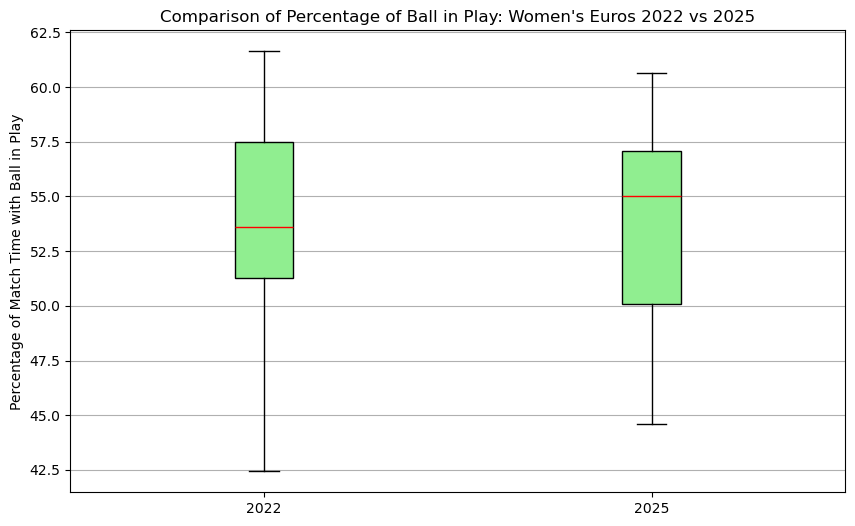

In [65]:
# Boxplot of match durations percentage in play for 2022 and 2025
data_2022 = match_durations22['percentage_in_play']
data_2025 = match_durations['percentage_in_play']
data = [data_2022, data_2025]
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=['2022', '2025'], patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'))
plt.title('Comparison of Percentage of Ball in Play: Women\'s Euros 2022 vs 2025')
plt.ylabel('Percentage of Match Time with Ball in Play')
plt.grid(axis='y')
plt.show()

/var/folders/qd/1g8_rvks7_s9s6df6xjwzfxw0000gn/T/ipykernel_42827/1870296676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percentage_in_play', y='team', data=team_durations, palette='viridis')


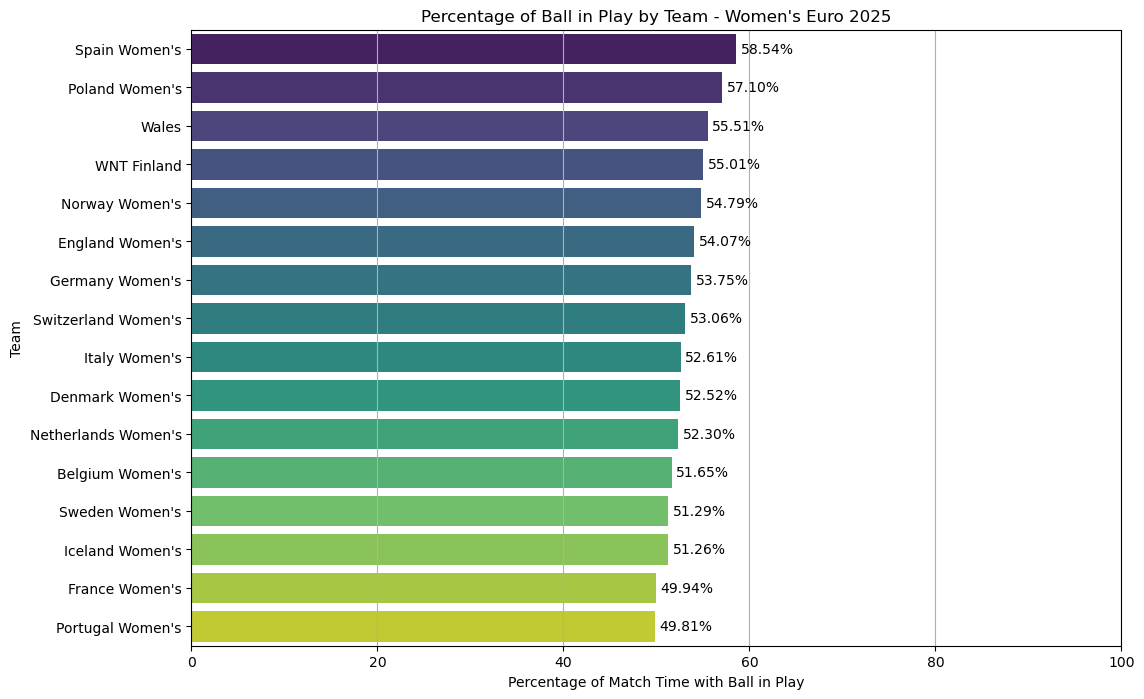

In [72]:


# sort in descending order
team_durations = team_durations.sort_values(by='percentage_in_play', ascending=False)
# Vertical Bar chart for 2025 by countries
plt.figure(figsize=(12, 8))
sns.barplot(x='percentage_in_play', y='team', data=team_durations, palette='viridis')
plt.title('Percentage of Ball in Play by Team - Women\'s Euro 2025')
plt.xlabel('Percentage of Match Time with Ball in Play')
plt.ylabel('Team')
plt.xlim(0, 100)
plt.grid(axis='x')

# show labels on bars
for index, value in enumerate(team_durations['percentage_in_play']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')
plt.show()